<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Pipes-encadenamiento-de-procesos-prediccion/blob/main/Pipes_Inversion_para_videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PIPES: Encadenamiento de procesos**

Un pipeline es una secuencia de pasos que se aplican a los datos en un orden específico, donde la salida de un paso se convierte en la entrada del siguiente. Se pueden encadenar pasos como:

* Limpieza de atípicos
* Imputación de nulos
* Transformaciones para variables numéricas y categóricas
* Predicciones con métodos de machine learning



#  Regresion: Inversión en una tienda de videojuegos

1. Preparación de datos creando un pipeline
2. División de los datos
3. Aprendizaje y evaluación de modelos
4. Pipeline del modelo final
5. Guardamos el modelo

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [ ]:
#Librerías para el Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

# **1. Preparación de datos creando un pipeline**


In [ ]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   videojuego                 152 non-null    object
 1   Edad                       152 non-null    int64 
 2   Sexo                       152 non-null    object
 3   Plataforma                 152 non-null    object
 4   Consumidor_habitual        152 non-null    bool  
 5   Presupuesto para invertir  152 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 6.2+ KB


In [ ]:
#Correccion de tipos de datos
data['videojuego']=data['videojuego'].astype('category')
data['Plataforma']=data['Plataforma'].astype('category')
data['Sexo']=data['Sexo'].astype('category')


In [ ]:
#Data Profiling



In [ ]:
#SimpleImputer esta sacando error cuando la var es category

data['videojuego']=data['videojuego'].astype('object')
data['Plataforma']=data['Plataforma'].astype('object')
data['Sexo']=data['Sexo'].astype('object')

In [ ]:
#Descripción de variables numéricas
data.describe()

,Edad,Presupuesto para invertir
count,152.000000,152.000000
mean,28.000000,343.289474
std,9.990724,291.945464
min,14.000000,20.000000
25%,21.000000,100.000000
50%,26.000000,275.000000
75%,34.000000,420.000000
max,52.000000,1200.000000


<Axes: >

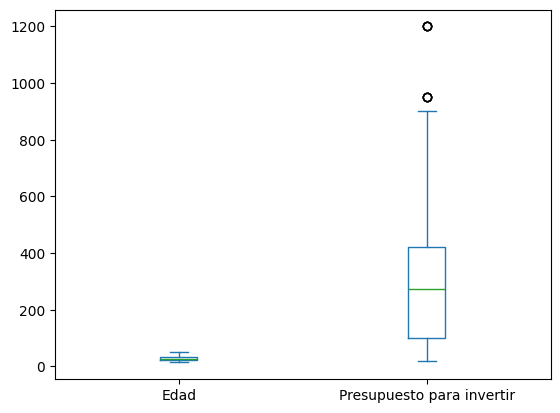

In [ ]:
data.plot(kind='box')

<Axes: xlabel='videojuego'>

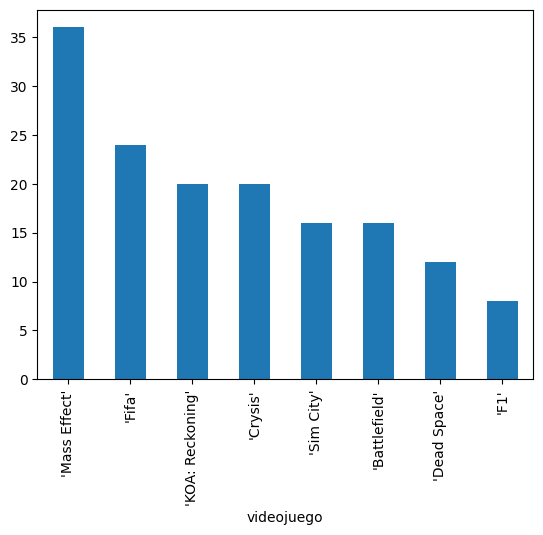

In [ ]:
#Descripción variables categóricas
data['videojuego'].value_counts().plot(kind='bar')

<Axes: xlabel='Plataforma'>

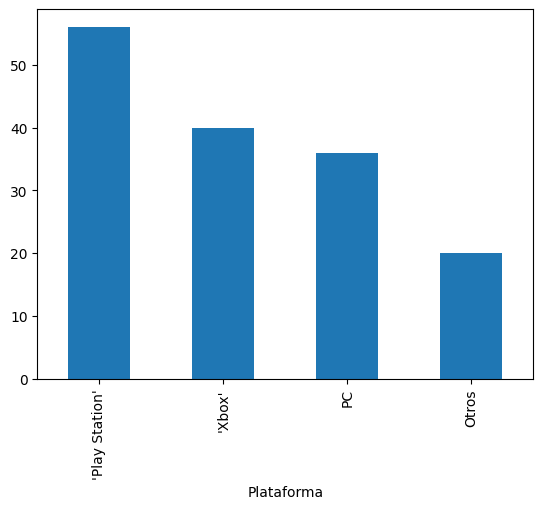

In [ ]:
data['Plataforma'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

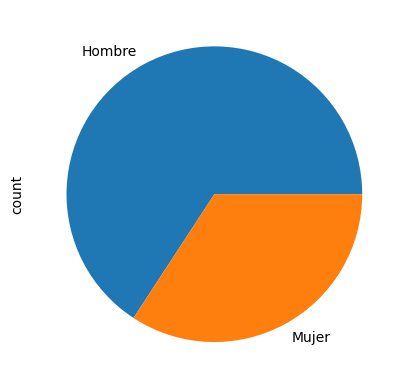

In [ ]:
data['Sexo'].value_counts().plot(kind='pie')

<Axes: xlabel='Consumidor_habitual'>

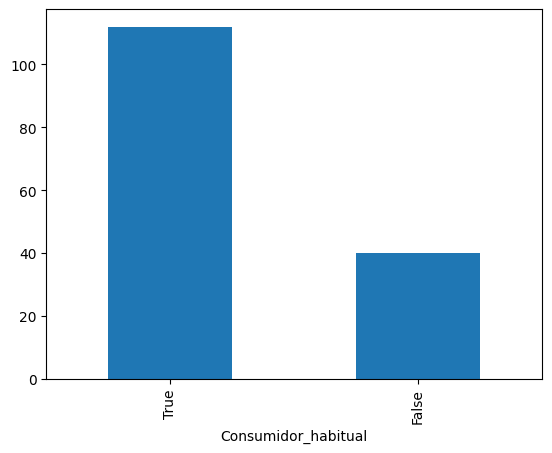

In [ ]:
data['Consumidor_habitual'].value_counts().plot(kind='bar')

# **Pipeline para Preparación de los Datos**

In [ ]:
#Separar predictoras y objetivo
X = data.drop("Presupuesto para invertir", axis = 1) # Variables predictoras
Y = data['Presupuesto para invertir'] #Variable objetivo

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['videojuego', 'Plataforma', 'Sexo', 'Consumidor_habitual']
numeric_cols = ['Edad']


In [ ]:
#Paso 1: Limpiar atípicos
def remove_outliers(X):
    #Se asigna valor nulo a los atípicos

    X.loc[(X["Edad"] < 12) | (X["Edad"] > 50), "Edad"] = np.nan
    X.loc[(X["Sexo"] != "Mujer") & (X["Sexo"] != "Hombre"), "Sexo"] = np.nan

    #Validar todas las variables


    return X



In [ ]:
# Paso 2: Imputar y transformaciones

# Para variables numéricas: Imputar por media y normalizar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Para variables categóricas: imputar por moda y crear dummies
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('dummies', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
])

# Unir los dos pasos anteriores
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [ ]:
# Definir el pipeline completo

pipe = Pipeline(steps=[
    ('outliers', FunctionTransformer(remove_outliers)),
    ('preprocessor', preprocessor)
])

pipe

Pipeline(steps=[('outliers',
                 FunctionTransformer(func=<function remove_outliers at 0x7955123667a0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Edad']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummies',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['videojuego', 'Plataforma',
                                                   'Sexo',
                                                   'Consumidor_habitual'])]))])

In [ ]:
#Aplicar el pipe a los datos
X_processed = pipe.fit_transform(X)
X_processed


array([[0.44117647, 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.38235294, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.23529412, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61764706, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.64705882, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37336601, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# **2. División 70-30**


<Axes: >

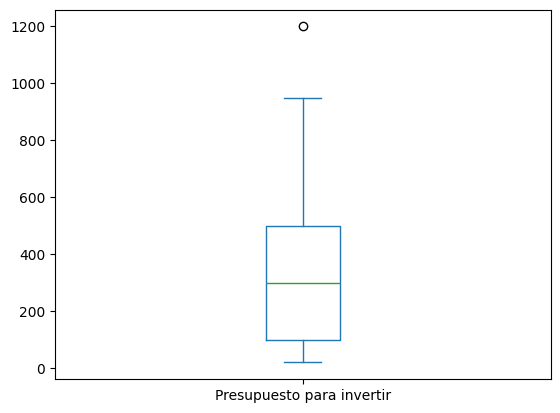

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.3)
Y_train.plot(kind='box')

# **3. Aprendizaje  70% y Evaluación 30%**

# KNN


In [ ]:
from sklearn.neighbors import  KNeighborsRegressor
model_Knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean') #minkowski
model_Knn.fit(X_train, Y_train) #70%

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [ ]:
medidas=pd.DataFrame()

   Knn
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


<ipython-input-119-08494ef2164a>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


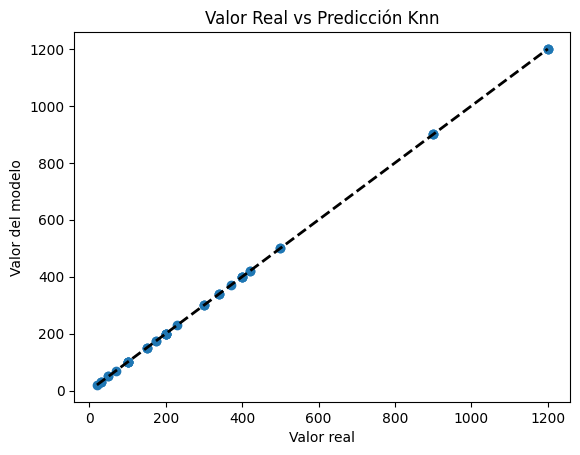

In [ ]:
#Evaluación de Knn
from sklearn import metrics

Y_pred = model_Knn.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Knn')
plt.show()

# Red Neuronal

In [ ]:
from sklearn.neural_network import MLPRegressor

model_NN = MLPRegressor(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.3, momentum= 0.2, max_iter=5000,  random_state=3)

model_NN.fit(X_train, Y_train)#70%

MLPRegressor(hidden_layer_sizes=16, learning_rate_init=0.3, max_iter=5000,
             momentum=0.2, random_state=3)

   Knn                 NN
0  0.0  1142.039279811439
1  0.0          33.794072
2  0.0          15.462268
3  0.0           0.090923
4  0.0         125.315835


<ipython-input-121-8215c34b1d1a>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


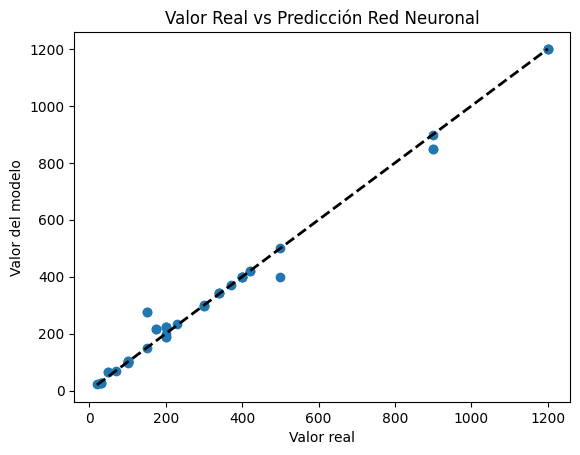

In [ ]:
#Evaluación de NN
from sklearn import metrics

Y_pred = model_NN.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[format(mse), rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

# **4. Crear Pipeline con modelo final**

In [ ]:
# Reentrenar el modelo con todos los datos
model_Knn.fit(X_processed, Y)

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [ ]:
# Crea el pipeline con el escalado, codificación y modelo

from sklearn.pipeline import Pipeline


pipeline_model = Pipeline([
    ('preprocessor', pipe),  # Aplica el preprocesamiento
    ('model', model_Knn)  # Modelo de red neuronal
])
pipeline_model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7955123667a0>)),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['Edad']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('dummies',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['videojuego',
                                                                    'Plataforma',
                                                                    'Sexo',
                                                                    'Consumidor_habitual'])]))])),
                ('model',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=1))])

# **5. Guardamos el modelo**

In [ ]:
#Se guarda el pipeline
import pickle
filename = 'pipeline_modelo.pkl'
pickle.dump(pipeline_model, open(filename, 'wb'))